In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/d/burcutas/titanic/gender_submission.csv
/kaggle/input/gender-submission/gender_submission.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
#warnings.simplefilter("ignore")

In [3]:
df= pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
def get_first_info(X):
    print("verimizin boyutu:",X.shape)
    print("__________________________________________")
    print(X.info())
    print("__________________________________________")
    print(X.describe().T)

In [6]:
get_first_info(df)

verimizin boyutu: (891, 12)
__________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
__________________________________________
              count    mean     std   min     25%     50%     75%     max
PassengerId 891.000 446.000 257.354 1.000 223.500 4

In [7]:
def grab_col_names(dataframe,cat_upper_limit=10 ,cardinal_lower_limit = 20): 
    """ 
    This function helps to determine types of columns. Numerical,Categorical,Cardinal 
    Parameters: dataframe = DataFrame 
    cat_upper_limit = upper limit of categorical columns's number of unique ->values 10 inital value
    cardinal_lowe_limit = lower limit to classify a column as cardinal -> 20 initial value
    Return: 
    cat_cols: includes categorical names but also includes encoding columns or has less unique value than cat_lower_limit
    num_cols: includes  names of numerical columns 
    cardinal_cols : includes names of cardinal columns.In other words,columns which does not carry information. 
    """  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_upper_limit and 
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_lower_limit and 
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
 
    return cat_cols,num_cols,cat_but_car

In [8]:
cat_cols,num_cols,cardinal_cols = grab_col_names(df)

In [9]:
print(cat_cols,num_cols,cardinal_cols)

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch'] ['PassengerId', 'Age', 'Fare'] ['Name', 'Ticket', 'Cabin']


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_data(df,num_cols,cat_cols): 
    for col in cat_cols:  
        sns.countplot(x=df[col],data=df) 
        plt.title(col) 
        plt.show() 
        print("---------------------------------------------------------------------------") 

    for col in num_cols: 
        df[col].hist() 
        plt.title(col) 
        print("-------------------------------------------------------------------------------") 
        plt.show()


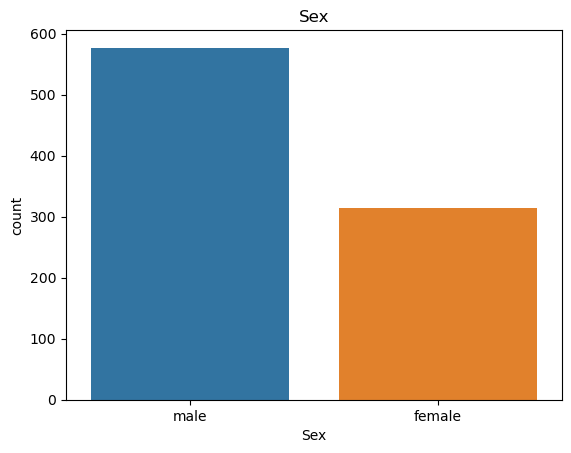

---------------------------------------------------------------------------


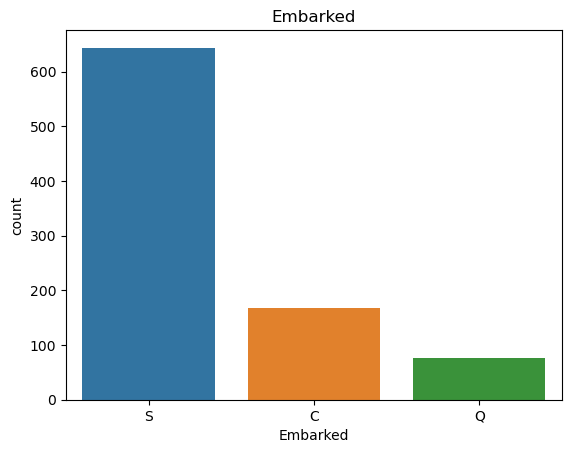

---------------------------------------------------------------------------


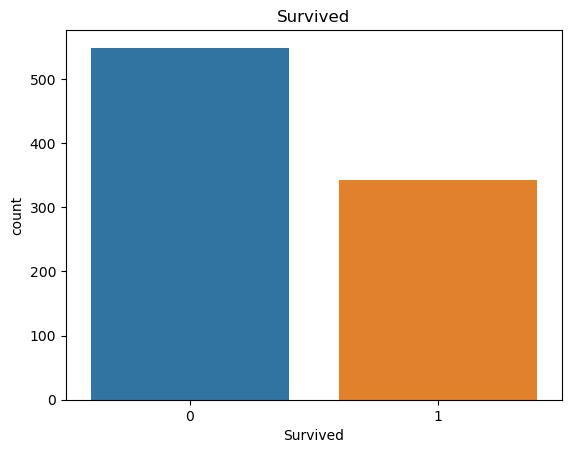

---------------------------------------------------------------------------


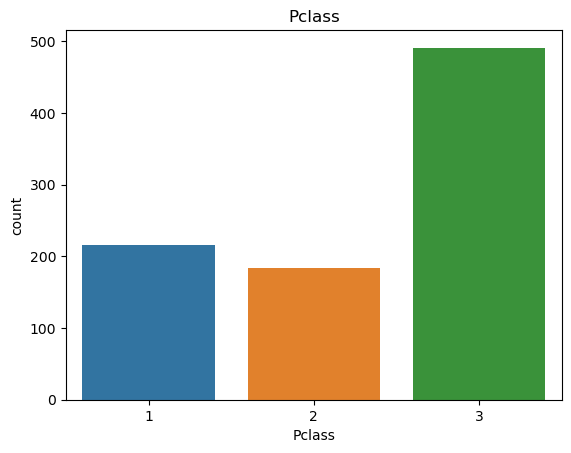

---------------------------------------------------------------------------


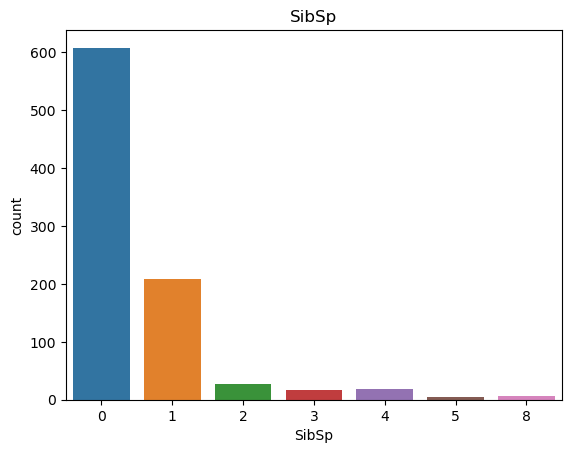

---------------------------------------------------------------------------


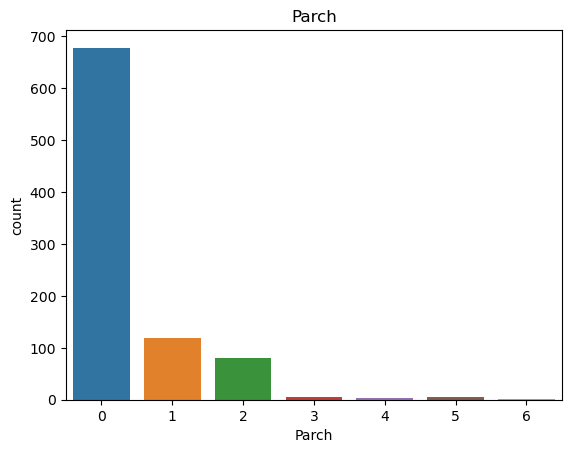

---------------------------------------------------------------------------
-------------------------------------------------------------------------------


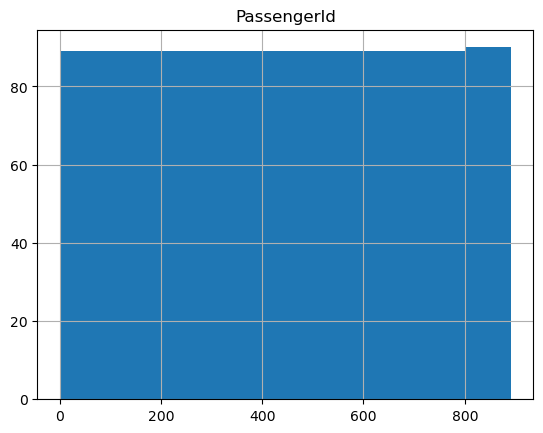

-------------------------------------------------------------------------------


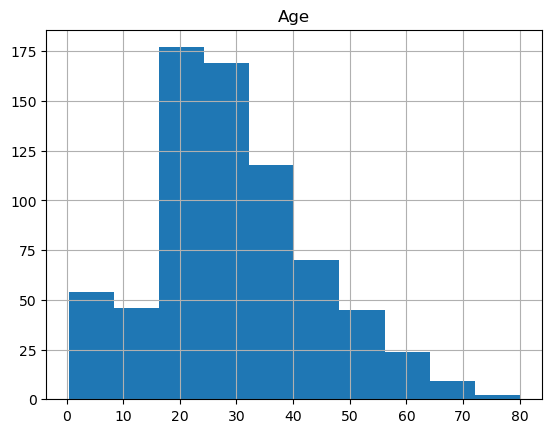

-------------------------------------------------------------------------------


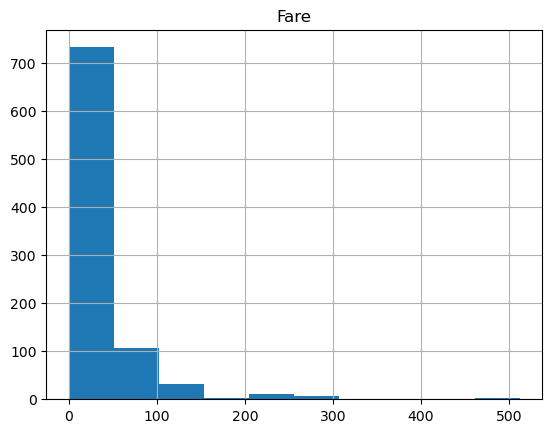

In [11]:
plot_data(df,num_cols,cat_cols)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

<AxesSubplot:>

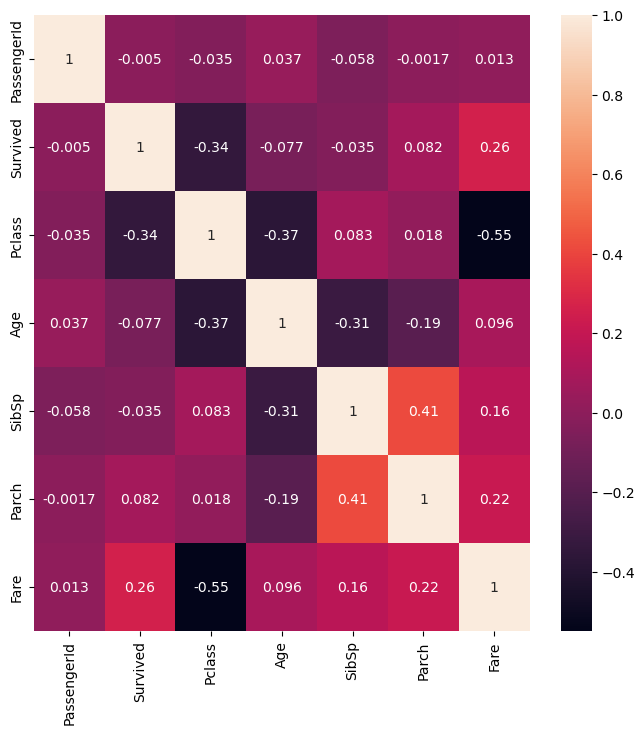

In [14]:
corr = df.corr()  
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr,annot=True)

In [15]:
def Drop_High_Corr(df,corr_level=0.80) : 
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than cor level
    to_drop = [column for column in upper.columns if any(upper[column] > corr_level)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

In [16]:
Drop_High_Corr(df,corr_level=0.80)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [20]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [21]:
#df["Embarked"].head()
df["Embarked"].fillna("S",inplace=True)

In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler 

In [26]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730,0,3,"Braund, Mr. Owen Harris",male,-0.566,1,0,A/5 21171,-0.502,S
1,-1.726,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.664,1,0,PC 17599,0.787,C
2,-1.722,1,3,"Heikkinen, Miss. Laina",female,-0.258,0,0,STON/O2. 3101282,-0.489,S
3,-1.718,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433,1,0,113803,0.421,S
4,-1.715,0,3,"Allen, Mr. William Henry",male,0.433,0,0,373450,-0.486,S


In [27]:
df.drop(['Name','Ticket'], axis = 1, inplace = True)

In [28]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [29]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [30]:
for col in num_cols:
    print(check_outlier(df,col))

False
False
True


In [31]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [32]:
for col in num_cols: 
    replace_with_thresholds(df,col,0.05,0.95)

In [33]:
for col in num_cols:
    print(check_outlier(df,col))

False
False
False


In [34]:
df = pd.get_dummies(df,drop_first=True) 
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.730,0,3,-0.566,1,0,-0.502,1,0,1
1,-1.726,1,1,0.664,1,0,0.787,0,0,0
2,-1.722,1,3,-0.258,0,0,-0.489,0,0,1
3,-1.718,1,1,0.433,1,0,0.421,0,0,1
4,-1.715,0,3,0.433,0,0,-0.486,1,0,1


In [35]:
df.drop(['PassengerId'], axis = 1, inplace = True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [37]:
y = df["Survived"]
X = df.drop("Survived",axis=1) 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=17)

In [39]:
X_train.shape

(712, 8)

In [40]:
y_train.shape

(712,)

In [41]:
from sklearn.linear_model import LogisticRegression 

In [42]:
model = LogisticRegression().fit(X_train,y_train)

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.74
Recall: 0.69
Precision: 0.67
F1: 0.68
Auc: 0.73
